# Projet file rouge : Allstate Claims Severity

## Présentation du sujet:

$\textbf{Allstate}$ est une compagnie d'assurance qui s'est mise au point des méthodes automatisées de prévision du coût, et donc de la gravité, des sinistres. 

Le but du projet étant de prédir la sévérité des sinistres.

Nous disposons de deux bases de données contenant des sinistres historiques et leurs différents coûts. Une base qui nous servira pour entraîner les différents modèles predictives que nous allons élaborer, et une base test sur laquelle nous allons tester la performance du modèle prédictive.

les bases de données contient des variables quantitatives (cont1,cont2...) et des variables qualitatives (cat1,cat2,...) ainsi que la variable à prédire notée "loss".

La difficulté reside dans le fait que nous avons pas les vrais labels des variables ce qui compliquera la compréhension des resultats.

Etapes de l'études:
    
        1- Analyse descriptive : 
        2- 


#Commentaires:

        - Utilisation de l'ACP que lorsqu'il a présence des variables corrélées

In [1]:
#Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


### Importation et lecture des données

In [2]:
#Data import
data=pd.read_csv('C:/Users/Grabus2/Desktop/Allstate Claims severity/train.csv',sep=',',header=0)
data=pd.DataFrame(data)

In [3]:
#Extrait du Data
data.head(10)

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85
5,13,A,B,A,A,A,A,A,A,B,...,0.364464,0.401162,0.26847,0.46226,0.50556,0.366788,0.359249,0.345247,0.726792,5142.87
6,14,A,A,A,A,B,A,A,A,A,...,0.381515,0.363768,0.24564,0.40455,0.47225,0.334828,0.352251,0.342239,0.382931,1132.22
7,20,A,B,A,B,A,A,A,A,B,...,0.867021,0.583389,0.90267,0.84847,0.80218,0.644013,0.785706,0.859764,0.242416,3585.75
8,23,A,B,B,B,B,A,A,A,B,...,0.628534,0.384099,0.61229,0.38249,0.51111,0.682315,0.669033,0.756454,0.361191,10280.20
9,24,A,B,A,A,B,B,A,A,B,...,0.713343,0.469223,0.30260,0.67135,0.83510,0.863052,0.879347,0.822493,0.294523,6184.59


## Exploration des données

In [4]:
#data size
print("nombre d'observations (lignes):",data.shape[0])
print("nombre de variables (colonnes):",data.shape[1])

#Verification des valeur 
nan_count=sum(len(data)-data.count())
print("Nombre des valeurs manquantes:",nan_count)

nombre d'observations (lignes): 188318
nombre de variables (colonnes): 132
Nombre des valeurs manquantes: 0


In [5]:
#del data['id']
data.columns #Après suppréssion de la colonne "id"

Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)

In [6]:
#informations générales
print(data.describe())

                  id          cont1          cont2          cont3  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean   294135.982561       0.493861       0.507188       0.498918   
std    169336.084867       0.187640       0.207202       0.202105   
min         1.000000       0.000016       0.001149       0.002634   
25%    147748.250000       0.346090       0.358319       0.336963   
50%    294539.500000       0.475784       0.555782       0.527991   
75%    440680.500000       0.623912       0.681761       0.634224   
max    587633.000000       0.984975       0.862654       0.944251   

               cont4          cont5          cont6          cont7  \
count  188318.000000  188318.000000  188318.000000  188318.000000   
mean        0.491812       0.487428       0.490945       0.484970   
std         0.211292       0.209027       0.205273       0.178450   
min         0.176921       0.281143       0.012683       0.069503   
25%         0.327354       0.2811

In [7]:
#Séparation des variables explicatives du la variable à prédir
X=data.iloc[:,0:131] #variables explicatives
Y=data["loss"] #variable à expliquer

#Séparation des variables explicatives en deux ensembles : Variables quantitatives et qualitatives
# variables numeriques
var_num = list(data.columns[(data.dtypes=="int")|(data.dtypes=="float")].drop("loss"))
var_num=pd.DataFrame(var_num)
print("\n On a {} variables numeriques : \n {} ".format(len(var_num),var_num))

# Variables categorielles
var_cat = list(data.columns[data.dtypes=="object"])
var_cat=pd.DataFrame(var_cat)
print("\n On a {} variables catégorielles : \n {} ".format(len(var_cat),var_cat))



 On a 14 variables numeriques : 
          0
0    cont1
1    cont2
2    cont3
3    cont4
4    cont5
5    cont6
6    cont7
7    cont8
8    cont9
9   cont10
10  cont11
11  cont12
12  cont13
13  cont14 

 On a 116 variables catégorielles : 
           0
0      cat1
1      cat2
2      cat3
3      cat4
4      cat5
5      cat6
6      cat7
7      cat8
8      cat9
9     cat10
10    cat11
11    cat12
12    cat13
13    cat14
14    cat15
15    cat16
16    cat17
17    cat18
18    cat19
19    cat20
20    cat21
21    cat22
22    cat23
23    cat24
24    cat25
25    cat26
26    cat27
27    cat28
28    cat29
29    cat30
..      ...
86    cat87
87    cat88
88    cat89
89    cat90
90    cat91
91    cat92
92    cat93
93    cat94
94    cat95
95    cat96
96    cat97
97    cat98
98    cat99
99   cat100
100  cat101
101  cat102
102  cat103
103  cat104
104  cat105
105  cat106
106  cat107
107  cat108
108  cat109
109  cat110
110  cat111
111  cat112
112  cat113
113  cat114
114  cat115
115  cat116

[116 rows x 1 c

In [8]:
print('nombre de variables qualitatives  :',var_cat.shape[0])
print('nombre de variables quantitatives :',var_num.shape[0])


nombre de variables qualitatives  : 116
nombre de variables quantitatives : 14


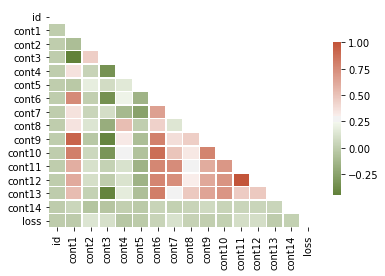

In [9]:
#Boxplot des variables explicatives
cmap = sns.diverging_palette(110, 20, as_cmap=True)
corr=data.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, cmap=cmap,cbar=True , linewidths=.5, cbar_kws={"shrink": .7})

Intérpretation:
        
     -Nous remarquons qu'il y a des corrélation entre certaines variables, et vue le grand nombre de variables, nous pouvons regarder si nous poubons supprimer quelques unes en utilisant les méthodes de selection de variables de type ACP, Ridge..
     

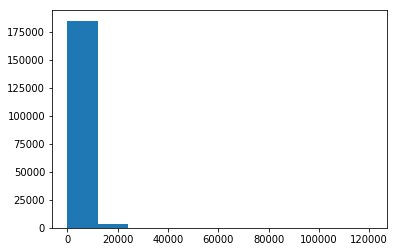

In [10]:
#boxplot des variables quantitatives
plt.hist(data["loss"]);

### Encodage des variables

In [12]:
# encoder les labels en utilisant la classe LabelEncoder() de scikit pour avoir des labels numeriques
# encodeur
encode_lab = LabelEncoder()
# encoder en hot-encoding les autres variables categorielles
print("Avant one-hot encoding")
print(data.columns)
print(data.shape)
# encodage
data1 = pd.get_dummies(var_cat, columns=var_cat)
print("Apres one-hot encoding")
print(data1.columns)
print(data1.shape)

Avant one-hot encoding
Index(['id', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8',
       'cat9',
       ...
       'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
       'cont13', 'cont14', 'loss'],
      dtype='object', length=132)
(188318, 132)


ValueError: Must pass DataFrame with boolean values only